Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6606 - loss: 0.6255 - val_accuracy: 0.7491 - val_loss: 0.5890
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7559 - loss: 0.5808 - val_accuracy: 0.7818 - val_loss: 0.5393
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.7688 - loss: 0.5385 - val_accuracy: 0.8327 - val_loss: 0.4919
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.8372 - loss: 0.4844 - val_accuracy: 0.8764 - val_loss: 0.4435
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.8750 - loss: 0.4533 - val_accuracy: 0.9273 - val_loss: 0.3915
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.9229 - loss: 0.3824 - val_accuracy: 0.9527 - val_loss: 0.3350
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.9399 - loss: 0.3320 - val_accuracy: 0.9600 - val_loss: 0.2837
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.9547 - loss: 0.2827 - val_accuracy: 0.9673 - val_loss

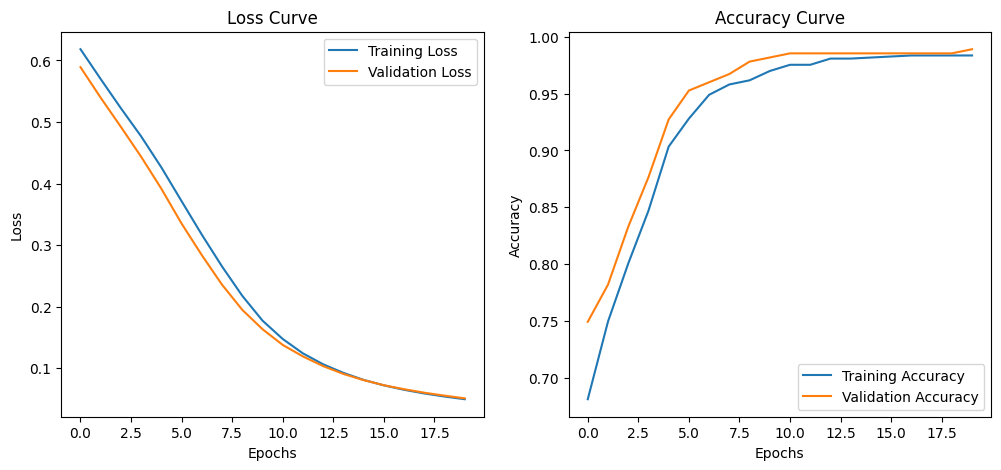

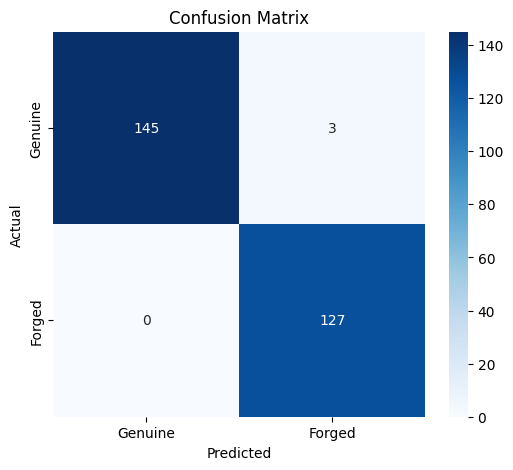

In [23]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('/Users/bharathi/Documents/BankNote_Authentication.csv', names=columns,header=None)

data = data.iloc[1:].reset_index(drop=True)
data = data.astype(float)
data.columns = columns
 

# Split features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']



# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features (scaling between 0 and 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Build the Feedforward Neural Network (FNN) model
model = tf.keras.Sequential([
   
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)), 
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to 0 or 1

# Step 8: Print evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Plot training and validation loss and accuracy
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Step 10: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Forged'], yticklabels=['Genuine', 'Forged'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

